In [1]:
import numpy as np
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# 1 Import libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option('display.float_format', lambda x: '%.3f' % x)
plt.rcParams["figure.figsize"] = (10,6)

# 2 Read dataset

In [3]:
df_0 = pd.read_csv('./KDDTrain+.txt')
df = df_0.copy()
df.head()

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,...,0.17,0.03,0.17.1,0.00.6,0.00.7,0.00.8,0.05,0.00.9,normal,20
0,0,udp,other,SF,146,0,0,0,0,0,...,0.000,0.600,0.880,0.000,0.000,0.000,0.000,0.000,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.100,0.050,0.000,0.000,1.000,1.000,0.000,0.000,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.000,0.000,0.030,0.040,0.030,0.010,0.000,0.010,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.070,0.070,0.000,0.000,0.000,0.000,1.000,1.000,neptune,21


## 2.1 Adjust column names

The dataset doesnt come with column names 
names from : https://www.kaggle.com/code/timgoodfellow/nsl-kdd-explorations#Data-transformations

In [4]:
columns = (['duration'
,'protocol_type'
,'service'
,'flag'
,'src_bytes'
,'dst_bytes'
,'land'
,'wrong_fragment'
,'urgent'
,'hot'
,'num_failed_logins'
,'logged_in'
,'num_compromised'
,'root_shell'
,'su_attempted'
,'num_root'
,'num_file_creations'
,'num_shells'
,'num_access_files'
,'num_outbound_cmds'
,'is_host_login'
,'is_guest_login'
,'count'
,'srv_count'
,'serror_rate'
,'srv_serror_rate'
,'rerror_rate'
,'srv_rerror_rate'
,'same_srv_rate'
,'diff_srv_rate'
,'srv_diff_host_rate'
,'dst_host_count'
,'dst_host_srv_count'
,'dst_host_same_srv_rate'
,'dst_host_diff_srv_rate'
,'dst_host_same_src_port_rate'
,'dst_host_srv_diff_host_rate'
,'dst_host_serror_rate'
,'dst_host_srv_serror_rate'
,'dst_host_rerror_rate'
,'dst_host_srv_rerror_rate'
,'attack'
,'level'])

df.columns = columns

In [5]:
df.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,udp,other,SF,146,0,0,0,0,0,...,0.000,0.600,0.880,0.000,0.000,0.000,0.000,0.000,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.100,0.050,0.000,0.000,1.000,1.000,0.000,0.000,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.000,0.000,0.030,0.040,0.030,0.010,0.000,0.010,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.070,0.070,0.000,0.000,0.000,0.000,1.000,1.000,neptune,21


## 2.2 Understanding the data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125972 non-null  int64  
 1   protocol_type                125972 non-null  object 
 2   service                      125972 non-null  object 
 3   flag                         125972 non-null  object 
 4   src_bytes                    125972 non-null  int64  
 5   dst_bytes                    125972 non-null  int64  
 6   land                         125972 non-null  int64  
 7   wrong_fragment               125972 non-null  int64  
 8   urgent                       125972 non-null  int64  
 9   hot                          125972 non-null  int64  
 10  num_failed_logins            125972 non-null  int64  
 11  logged_in                    125972 non-null  int64  
 12  num_compromised              125972 non-null  int64  
 13 

In [7]:
df['attack'].head()

0     normal
1    neptune
2     normal
3     normal
4    neptune
Name: attack, dtype: object

In [8]:
df['attack'].head()

0     normal
1    neptune
2     normal
3     normal
4    neptune
Name: attack, dtype: object

In [9]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
duration,125972.000,NaN,NaN,NaN,287.147,2604.526,0.000,0.000,0.000,0.000,42908.000
protocol_type,125972,3,tcp,102688,NaN,NaN,NaN,NaN,NaN,NaN,NaN
service,125972,70,http,40338,NaN,NaN,NaN,NaN,NaN,NaN,NaN
flag,125972,11,SF,74944,NaN,NaN,NaN,NaN,NaN,NaN,NaN
src_bytes,125972.000,NaN,NaN,NaN,45567.101,5870354.481,0.000,0.000,44.000,276.000,1379963888.000
dst_bytes,125972.000,NaN,NaN,NaN,19779.271,4021285.112,0.000,0.000,0.000,516.000,1309937401.000
land,125972.000,NaN,NaN,NaN,0.000,0.014,0.000,0.000,0.000,0.000,1.000
wrong_fragment,125972.000,NaN,NaN,NaN,0.023,0.254,0.000,0.000,0.000,0.000,3.000
urgent,125972.000,NaN,NaN,NaN,0.000,0.014,0.000,0.000,0.000,0.000,3.000
hot,125972.000,NaN,NaN,NaN,0.204,2.150,0.000,0.000,0.000,0.000,77.000


# 3. Data Cleaning

## 3.1 NULL values

In [10]:
df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

no null values

In [11]:
def unique_values(df,columns):
    ''' We are printing the unique values from specific columns'''
    for column_name in columns:
        print(f"Column: {column_name}\n{'-'*30}")
        unique_vals = df[column_name].unique()
        value_counts = df[column_name].value_counts()
        print(f"Unique Values ({len(unique_vals)}): {unique_vals}\n")
        print(f"Value Counts:\n{value_counts}\n{'='*40}\n")

The function will provide insights into:
Diversity of protocols, services, and flags.
Attack types and their frequency.


Print unique values from specified columns.
Count and display occurrences of each unique value.

In [12]:
cat_features = df.select_dtypes(include= 'object').columns
unique_values(df, cat_features)

Column: protocol_type
------------------------------
Unique Values (3): ['udp' 'tcp' 'icmp']

Value Counts:
protocol_type
tcp     102688
udp      14993
icmp      8291
Name: count, dtype: int64

Column: service
------------------------------
Unique Values (70): ['other' 'private' 'http' 'remote_job' 'ftp_data' 'name' 'netbios_ns'
 'eco_i' 'mtp' 'telnet' 'finger' 'domain_u' 'supdup' 'uucp_path' 'Z39_50'
 'smtp' 'csnet_ns' 'uucp' 'netbios_dgm' 'urp_i' 'auth' 'domain' 'ftp'
 'bgp' 'ldap' 'ecr_i' 'gopher' 'vmnet' 'systat' 'http_443' 'efs' 'whois'
 'imap4' 'iso_tsap' 'echo' 'klogin' 'link' 'sunrpc' 'login' 'kshell'
 'sql_net' 'time' 'hostnames' 'exec' 'ntp_u' 'discard' 'nntp' 'courier'
 'ctf' 'ssh' 'daytime' 'shell' 'netstat' 'pop_3' 'nnsp' 'IRC' 'pop_2'
 'printer' 'tim_i' 'pm_dump' 'red_i' 'netbios_ssn' 'rje' 'X11' 'urh_i'
 'http_8001' 'aol' 'http_2784' 'tftp_u' 'harvest']

Value Counts:
service
http         40338
private      21853
domain_u      9043
smtp          7313
ftp_data      6859
 

Categorical Features:
protocol_type: 3 unique values (tcp, udp, icmp) with tcp dominating (81.5% of the dataset).
service: 70 unique services, with http being the most common.
flag: 11 unique flags, with SF being the most frequent (indicating a successful connection).
attack: 23 unique attack types, where normal traffic has the most entries, followed by neptune.

## 3.2 Duplicates


In [13]:
df.duplicated().sum()

np.int64(0)

no duplicated rows

## 3.3 Outliers

In [14]:
df.shape

(125972, 43)

<Figure size 2000x4000 with 0 Axes>

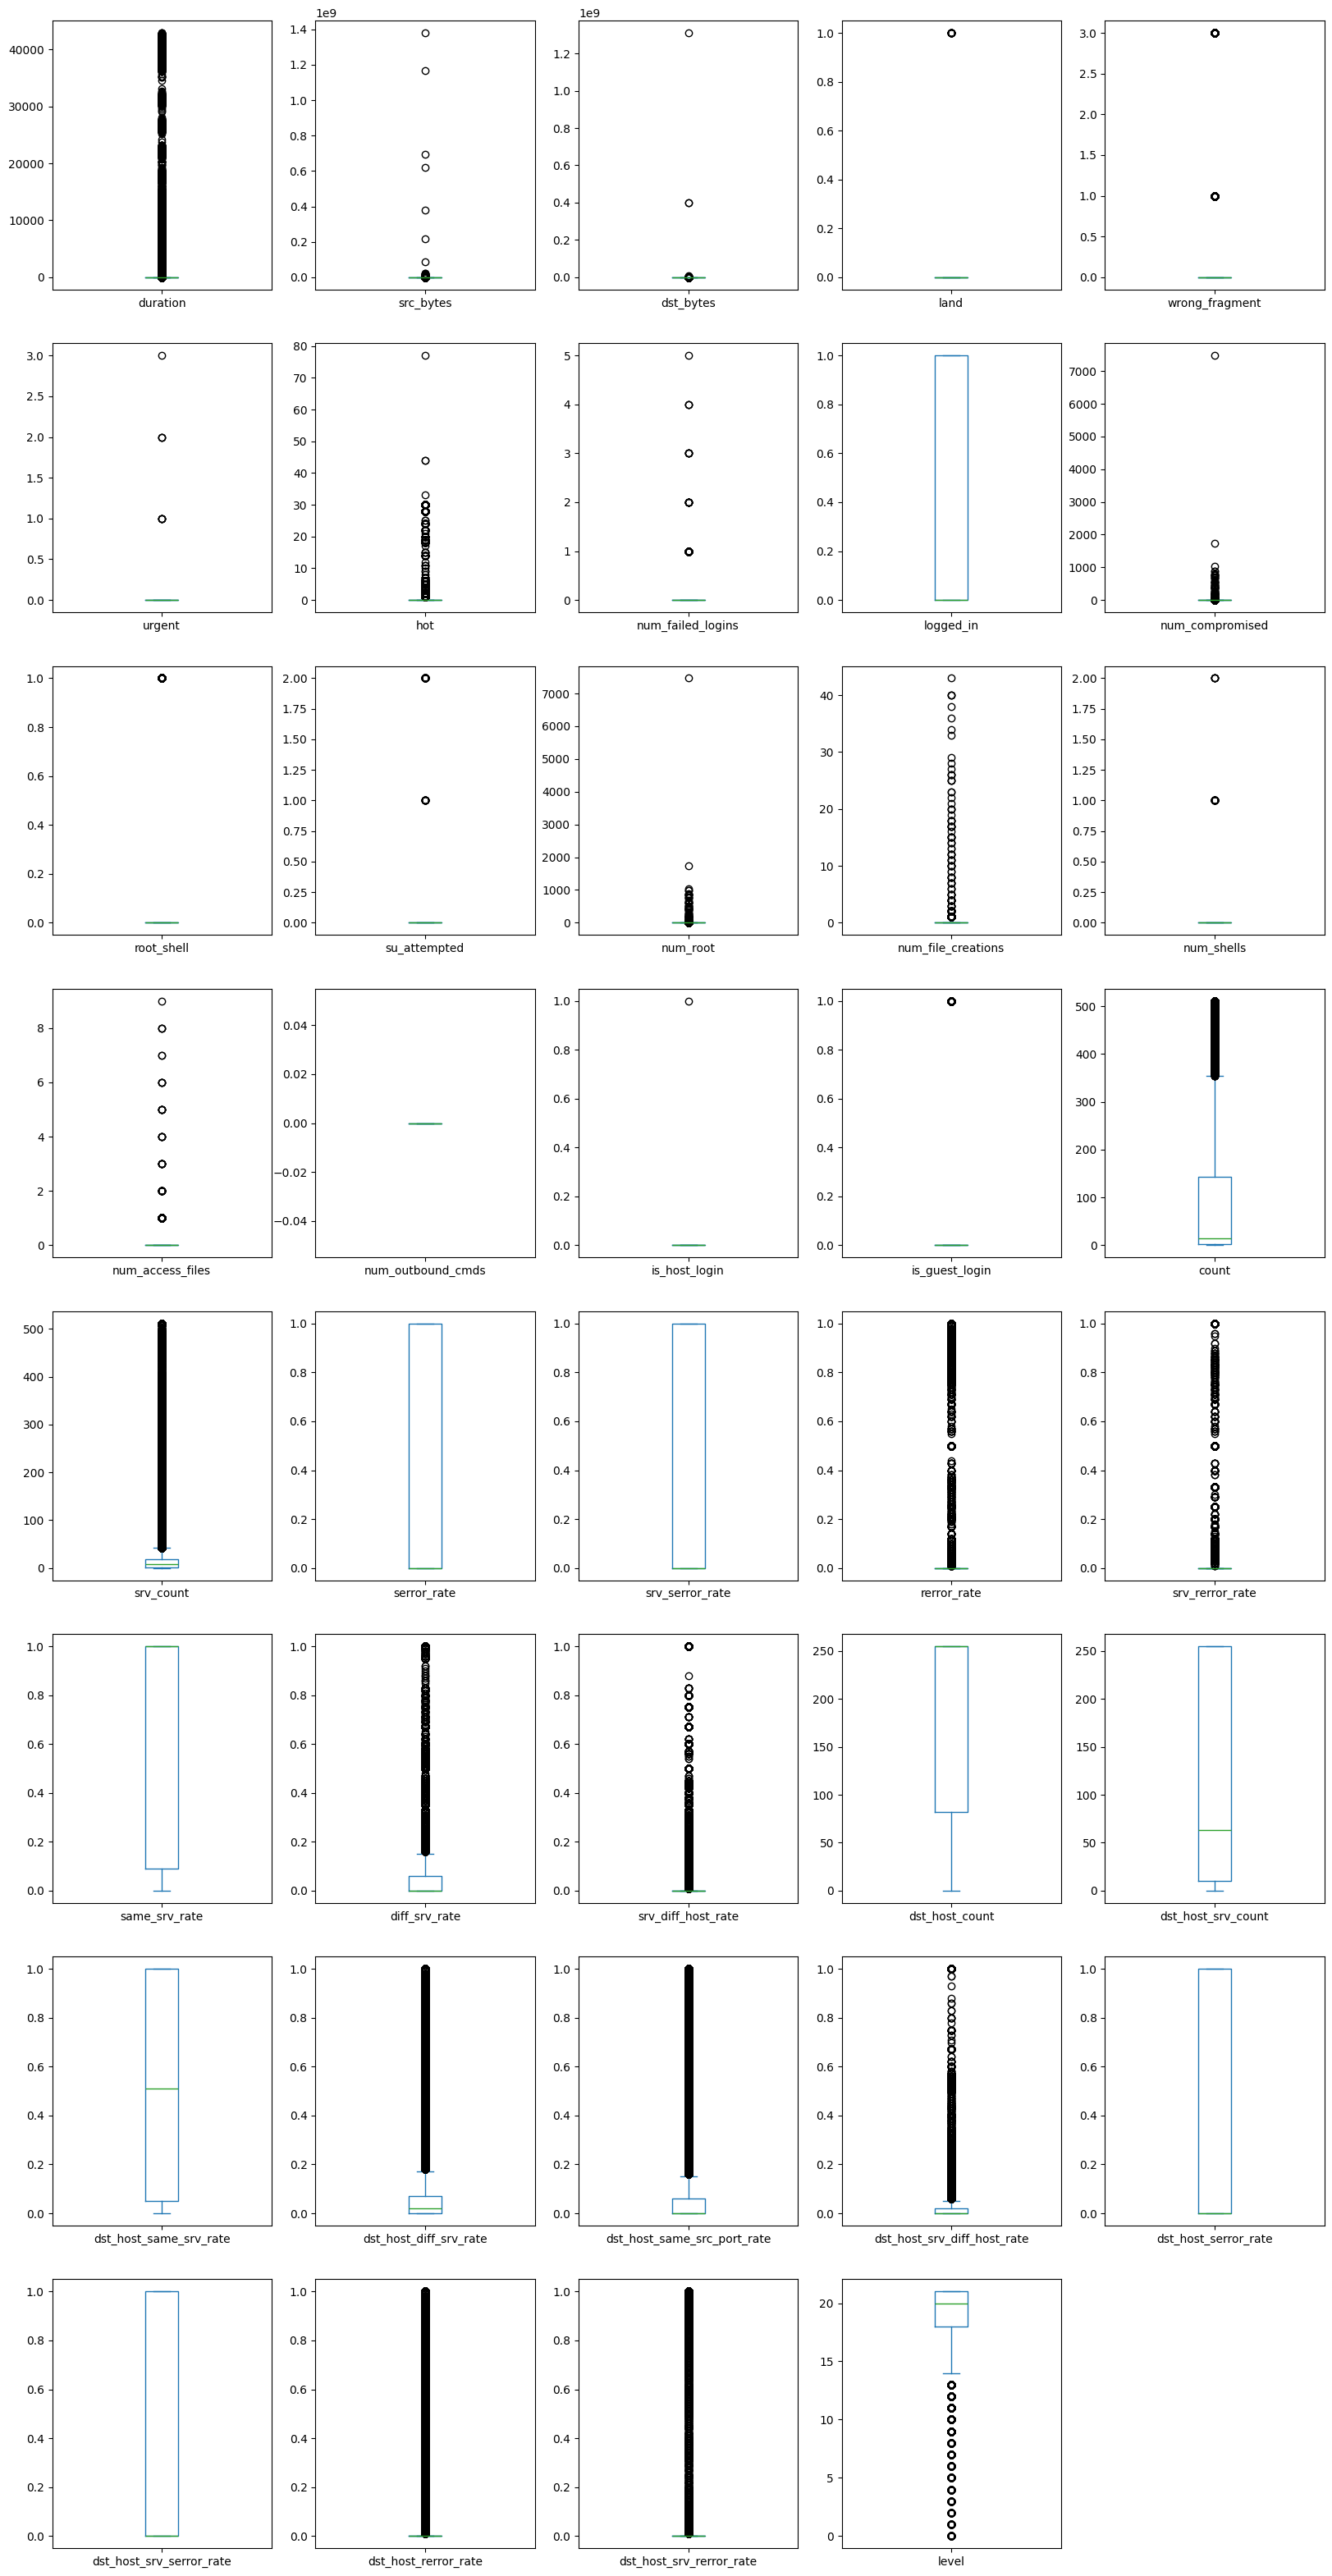

In [15]:
plt.figure(figsize = (20,40))
df.plot(kind = 'box', subplots = True , layout = (8,5) , figsize = (20,40))
plt.show()

## attack classification by type


In [16]:
# map normal to 0, all attacks to 1
is_attack = df.attack.map(lambda a: 0 if a == 'normal' else 1)



df['attack_flag'] = is_attack
# view the result
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level,attack_flag
0,0,udp,other,SF,146,0,0,0,0,0,...,0.600,0.880,0.000,0.000,0.000,0.000,0.000,normal,15,0
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.050,0.000,0.000,1.000,1.000,0.000,0.000,neptune,19,1
2,0,tcp,http,SF,232,8153,0,0,0,0,...,0.000,0.030,0.040,0.030,0.010,0.000,0.010,normal,21,0
3,0,tcp,http,SF,199,420,0,0,0,0,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,normal,21,0
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.070,0.000,0.000,0.000,0.000,1.000,1.000,neptune,21,1


In [17]:

dos_attacks = ['apache2','back','land','neptune','mailbomb','pod','processtable','smurf','teardrop','udpstorm','worm']
probe_attacks = ['ipsweep','mscan','nmap','portsweep','saint','satan']
privilege_attacks = ['buffer_overflow','loadmdoule','perl','ps','rootkit','sqlattack','xterm']
access_attacks = ['ftp_write','guess_passwd','http_tunnel','imap','multihop','named','phf','sendmail','snmpgetattack','snmpguess','spy','warezclient','warezmaster','xclock','xsnoop']


attack_labels = ['Normal','DoS','Probe','Privilege','Access']


def map_attack(attack):
    if attack in dos_attacks:
        # dos_attacks map to 1
        attack_type = 1
    elif attack in probe_attacks:
        # probe_attacks mapt to 2
        attack_type = 2
    elif attack in privilege_attacks:
        # privilege escalation attacks map to 3
        attack_type = 3
    elif attack in access_attacks:
        # remote access attacks map to 4
        attack_type = 4
    else:
        # normal maps to 0
        attack_type = 0
        
    return attack_type

# map the data and join to the data set
df['attack_map'] = df['attack'].apply(map_attack)



df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level,attack_flag,attack_map
0,0,udp,other,SF,146,0,0,0,0,0,...,0.880,0.000,0.000,0.000,0.000,0.000,normal,15,0,0
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.000,0.000,1.000,1.000,0.000,0.000,neptune,19,1,1
2,0,tcp,http,SF,232,8153,0,0,0,0,...,0.030,0.040,0.030,0.010,0.000,0.010,normal,21,0,0
3,0,tcp,http,SF,199,420,0,0,0,0,...,0.000,0.000,0.000,0.000,0.000,0.000,normal,21,0,0
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.000,0.000,0.000,0.000,1.000,1.000,neptune,21,1,1


now we will proceede to classify attack types by protocol

In [18]:
attack_vs_protocol = pd.crosstab(df.attack, df.protocol_type)
attack_vs_protocol

protocol_type,icmp,tcp,udp
attack,,,
back,0,956,0
buffer_overflow,0,30,0
ftp_write,0,8,0
guess_passwd,0,53,0
imap,0,11,0
ipsweep,3117,482,0
land,0,18,0
loadmodule,0,9,0
multihop,0,7,0


## 3.4 classify attack or not 

In [19]:
attack_n = []
for i in df.attack:
    if i == 'normal':
        attack_n.append("normal")
    else:
        attack_n.append("attack")
df['attack'] = attack_n

In [20]:
df['attack'].unique()

array(['normal', 'attack'], dtype=object)

In [21]:
print(df['attack'])

0         normal
1         attack
2         normal
3         normal
4         attack
           ...  
125967    attack
125968    normal
125969    normal
125970    attack
125971    normal
Name: attack, Length: 125972, dtype: object


## 4.1 Attack protocol type 

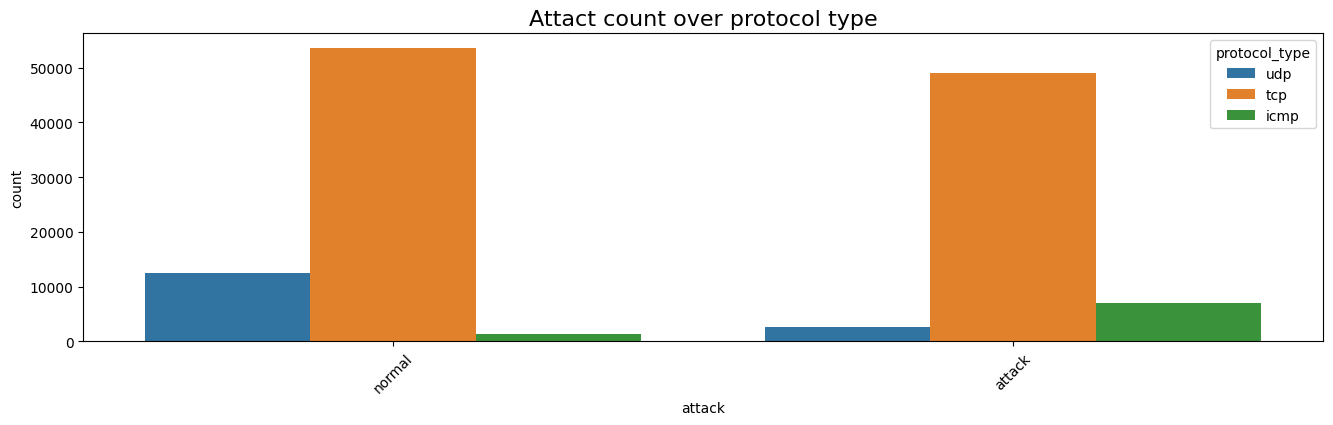

In [22]:
plt.figure(figsize= (16 , 4))
sns.countplot(x='attack',data = df , hue ="protocol_type")
plt.xticks(rotation=45)
plt.title("Attact count over protocol type" , fontdict = {'fontsize' : 16})
plt.show()
    

Hence we can infer that most of the attacks are done using TCP protocol then followed by UDP and then ICMP 

In [23]:
df["protocol_type"].value_counts(normalize = True)

protocol_type
tcp    0.815
udp    0.119
icmp   0.066
Name: proportion, dtype: float64

## 4.2 Service used generally 

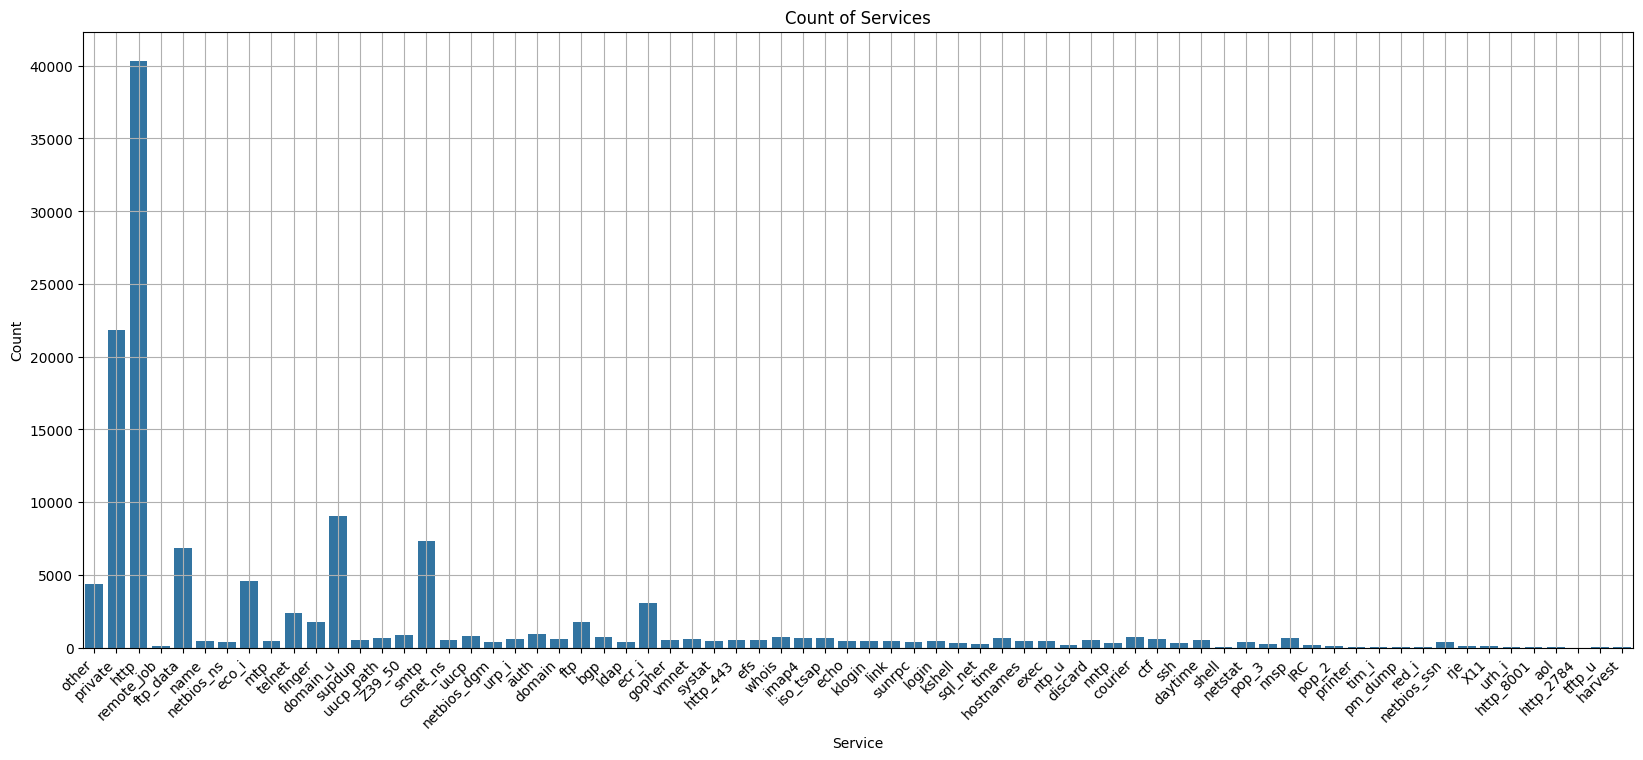

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 8))  
ax = sns.countplot(x='service', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")  # Rotated labels
plt.xlabel('Service')
plt.ylabel('Count')
plt.title('Count of Services')
plt.grid(True)
plt.show()

the most used services are http , private and others 

## 4.3 Service used and its affect on attack 

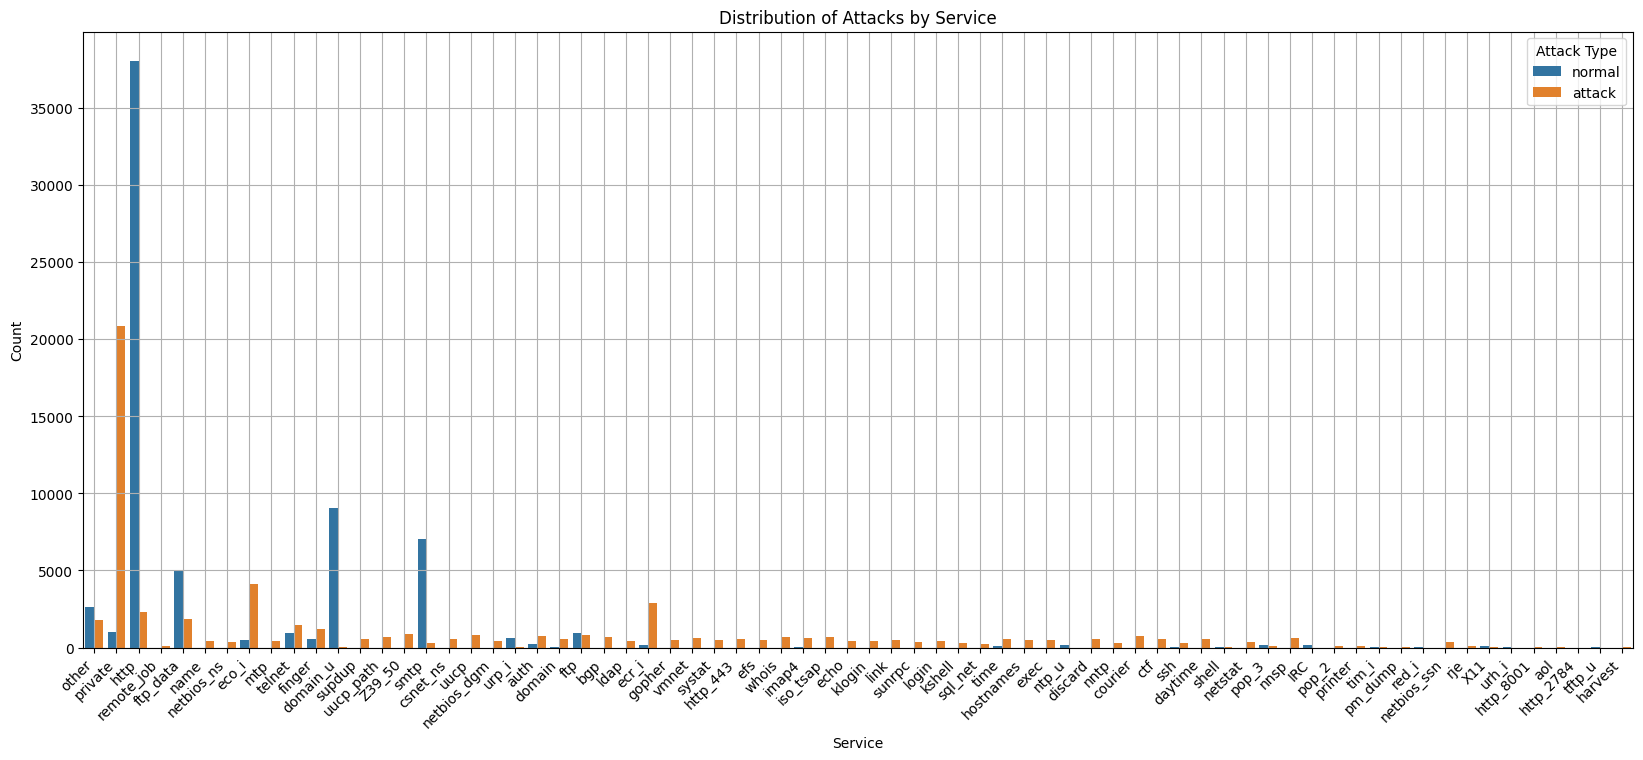

In [25]:
plt.figure(figsize = (20,8))
ax = sns.countplot(x='service', hue='attack', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")  # Rotated labels
plt.xlabel('Service')
plt.ylabel('Count')
plt.title('Distribution of Attacks by Service')
plt.legend(title='Attack Type')
plt.grid(True)
plt.show()

we notice that private have higher  attacks

# 5. Preprocessing

## 5.1 ENCODING

In [26]:
cat_features = df.select_dtypes(include ='object').columns
cat_features

Index(['protocol_type', 'service', 'flag', 'attack'], dtype='object')

In [27]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
clm = ['protocol_type','service','flag','attack']
for x in clm:
    df[x]=le.fit_transform(df[x])

encoding categorical features into numerical values so that they can be used as inputs for machine learning models


## 5.2 Train-Test-Split

In [28]:
from sklearn.model_selection import train_test_split

# Define features (X) and target values (y)
X = df.drop(['attack', 'attack_map'], axis=1)  # Drop 'attack' and 'attack_map' from the features
y = df[['attack', 'attack_map']]  # Use both 'attack' and 'attack_map' as target values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=43)

# Display the shapes to verify the split
print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}, y_test shape: {y_test.shape}")


X_train shape: (113374, 43), X_test shape: (12598, 43)
y_train shape: (113374, 2), y_test shape: (12598, 2)


In [29]:
train_index = X_train.columns
train_index

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'level', 'attack_flag'],
      dtype='object')

## 5.3 Feature Engineering

This is basically we are judging mutual information between each feature and the target variable.  we are measuring how much knowing the input variable will reduce the uncertinaty  about the target.
Feature Importance Calculation: The code calculates how much each feature contributes to predicting the target variable using mutual information.

In [30]:
from sklearn.feature_selection import mutual_info_classif
import pandas as pd

# Compute mutual information for the 'attack' target
mutual_info_attack = mutual_info_classif(X_train, y_train['attack'])

# Compute mutual information for the 'attack_map' target
mutual_info_attack_map = mutual_info_classif(X_train, y_train['attack_map'])

# Convert results to Series for easy comparison
mutual_info_attack = pd.Series(mutual_info_attack)
mutual_info_attack_map = pd.Series(mutual_info_attack_map)

# Set column names as indices
mutual_info_attack.index = X_train.columns
mutual_info_attack_map.index = X_train.columns

# Sort by mutual information (descending order)
mutual_info_attack_sorted = mutual_info_attack.sort_values(ascending=False)
mutual_info_attack_map_sorted = mutual_info_attack_map.sort_values(ascending=False)

# Display the results
print("Mutual Information with Attack (attack):")
print(mutual_info_attack_sorted)

print("\nMutual Information with Attack Map (attack_map):")
print(mutual_info_attack_map_sorted)


Mutual Information with Attack (attack):
attack_flag                   0.707
src_bytes                     0.566
service                       0.470
dst_bytes                     0.442
same_srv_rate                 0.368
flag                          0.367
diff_srv_rate                 0.361
dst_host_srv_count            0.335
dst_host_same_srv_rate        0.312
logged_in                     0.292
dst_host_diff_srv_rate        0.286
dst_host_serror_rate          0.285
dst_host_srv_serror_rate      0.282
serror_rate                   0.278
srv_serror_rate               0.270
count                         0.268
dst_host_srv_diff_host_rate   0.188
level                         0.152
dst_host_count                0.143
dst_host_same_src_port_rate   0.132
srv_diff_host_rate            0.098
srv_count                     0.064
dst_host_srv_rerror_rate      0.061
protocol_type                 0.053
rerror_rate                   0.040
dst_host_rerror_rate          0.037
srv_rerror_rate        

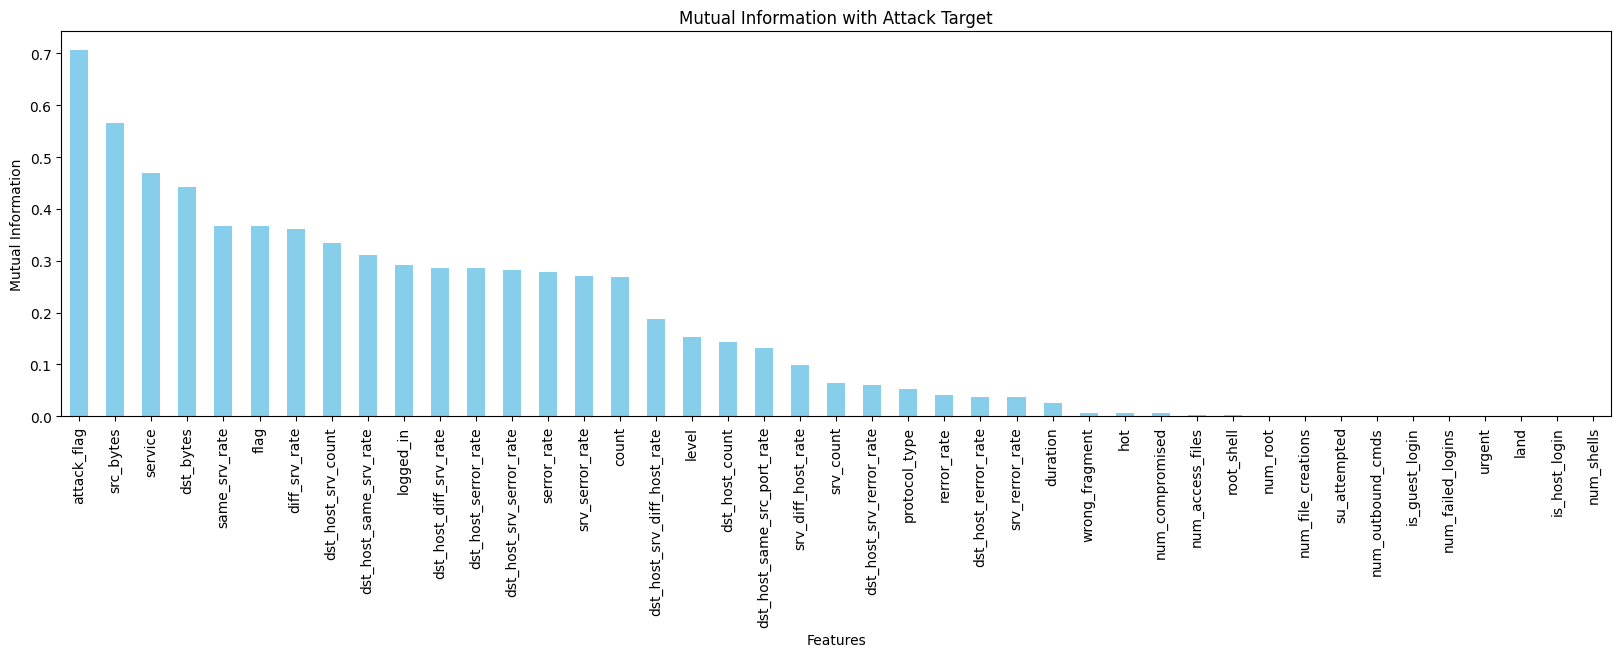

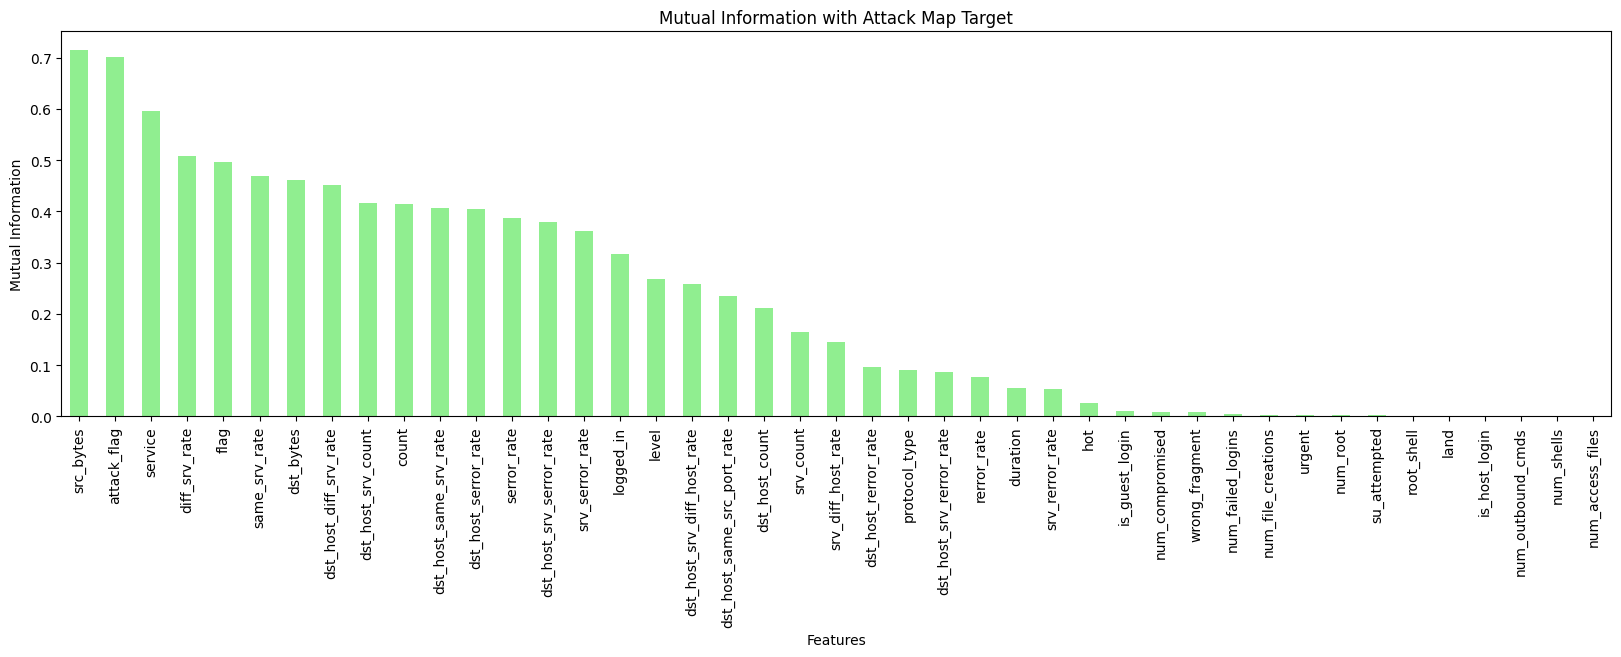

In [31]:
import matplotlib.pyplot as plt

# Plot mutual information for 'attack' target
mutual_info_attack_sorted.sort_values(ascending=False).plot.bar(figsize=(20, 5), color='skyblue')
plt.title('Mutual Information with Attack Target')
plt.xlabel('Features')
plt.ylabel('Mutual Information')
plt.xticks(rotation=90)
plt.show()

# Plot mutual information for 'attack_map' target
mutual_info_attack_map_sorted.sort_values(ascending=False).plot.bar(figsize=(20, 5), color='lightgreen')
plt.title('Mutual Information with Attack Map Target')
plt.xlabel('Features')
plt.ylabel('Mutual Information')
plt.xticks(rotation=90)
plt.show()


## 5.4 Feature selection

* Select Top Features: The code selects the top 30 features from X_train based on their mutual information scores and fits them on xtrain 
* Retrieve Selected Feature Names: It then retrieves the names of these selected features from train_index.

In [32]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# Select top 30 features based on mutual information for 'attack' target
Select_features_attack = SelectKBest(mutual_info_classif, k=30)
X_train_attack_selected = Select_features_attack.fit_transform(X_train, y_train['attack'])

# Select top 30 features based on mutual information for 'attack_map' target
Select_features_attack_map = SelectKBest(mutual_info_classif, k=30)
X_train_attack_map_selected = Select_features_attack_map.fit_transform(X_train, y_train['attack_map'])

# Get the selected features for both targets
selected_features_attack = X_train.columns[Select_features_attack.get_support()]
selected_features_attack_map = X_train.columns[Select_features_attack_map.get_support()]

# Display the selected features for both targets
print("Selected Features for Attack Target:")
print(selected_features_attack)

print("\nSelected Features for Attack Map Target:")
print(selected_features_attack_map)


Selected Features for Attack Target:
Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'wrong_fragment', 'hot', 'logged_in', 'count', 'srv_count',
       'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate',
       'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
       'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'level', 'attack_flag'],
      dtype='object')

Selected Features for Attack Map Target:
Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'wrong_fragment', 'hot', 'logged_in', 'count', 'srv_count',
       'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate',
       'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
       'd

We will only take the top 15 features as our dataset is large enough.

In [33]:
columns=['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'wrong_fragment', 'hot', 'logged_in', 'num_compromised',
       'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate']
X_train = X_train[columns]
X_test = X_test[columns]

## 5.5 Scaling

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)   

In [35]:
%pip install xgboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Binary Classification Accuracy: 0.9979

Binary Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5828
           1       1.00      1.00      1.00      6770

    accuracy                           1.00     12598
   macro avg       1.00      1.00      1.00     12598
weighted avg       1.00      1.00      1.00     12598


Binary Classification Confusion Matrix:
[[5811   17]
 [   9 6761]]

Multiclass Classification Accuracy: 0.9982

Multiclass Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6771
           1       1.00      1.00      1.00      4543
           2       0.99      0.99      0.99      1176
           3       0.00      0.00      0.00         1
           4       1.00      0.98      0.99       107

    accuracy                           1.00     12598
   macro avg       0.80      0.79      0.80     12598
weighted avg       1.0

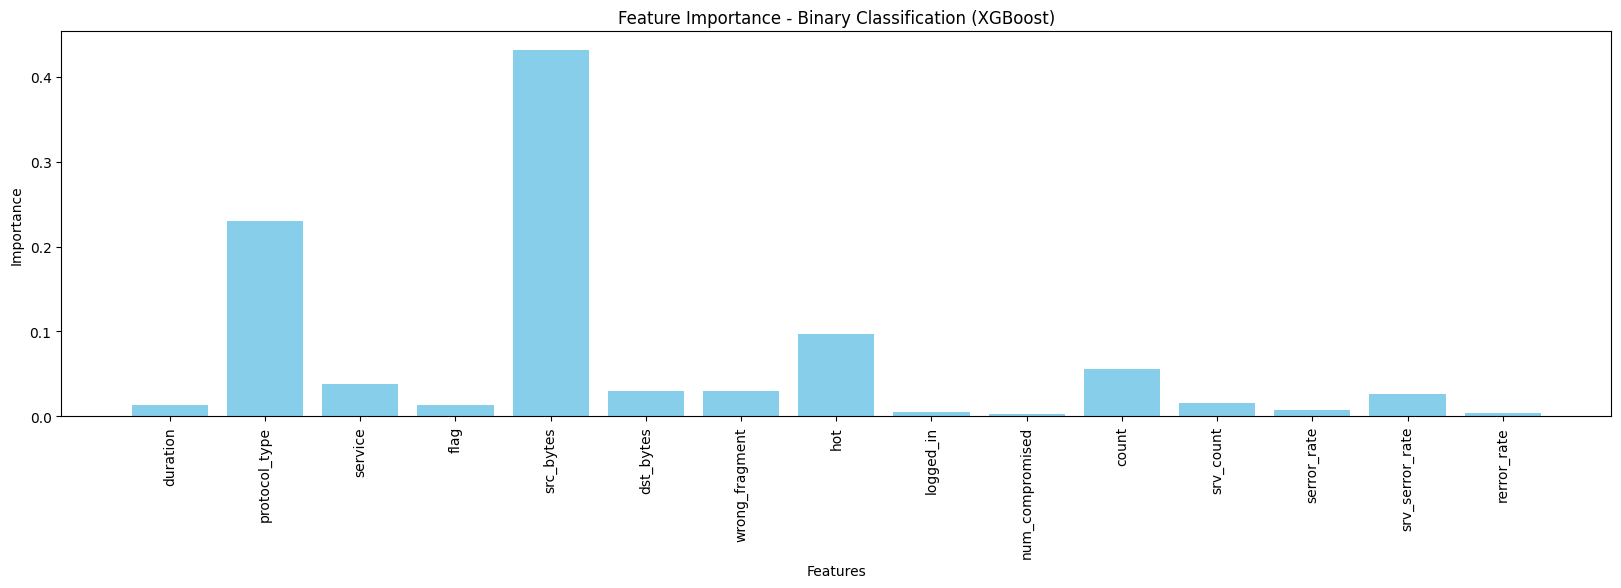

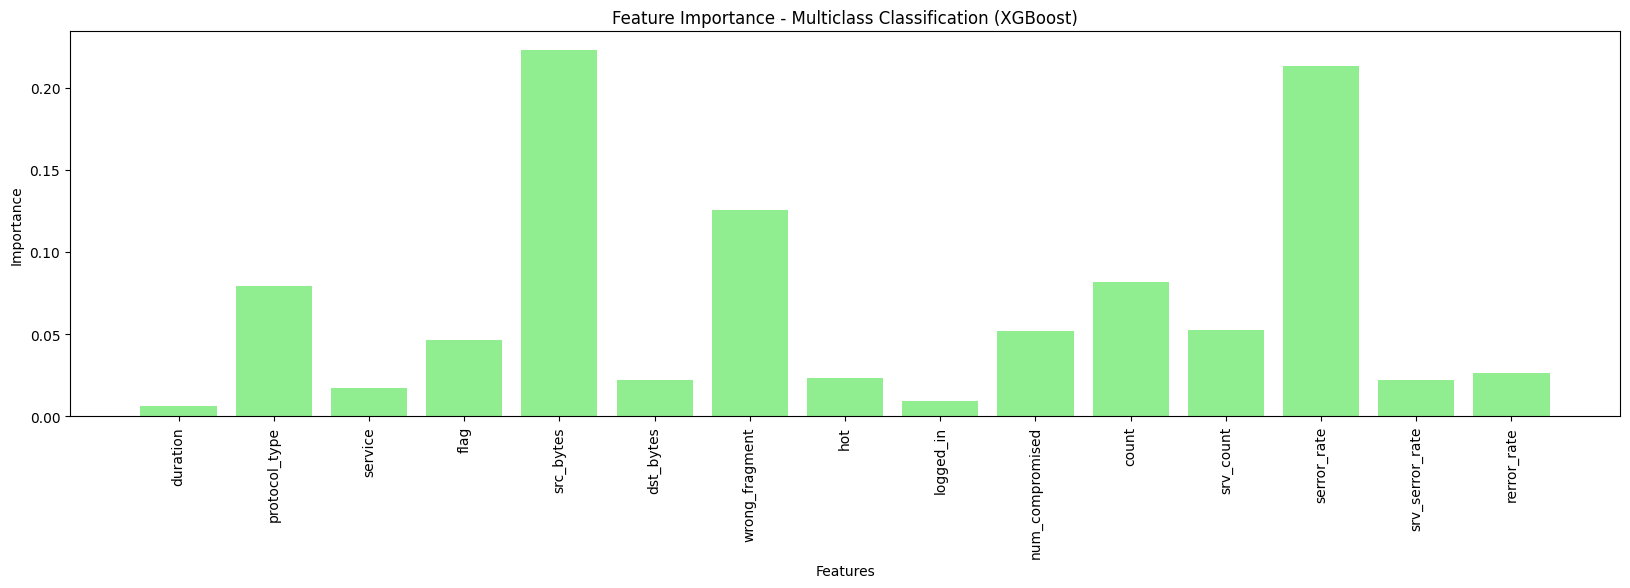

In [36]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# List of features that you're using for training
columns = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
           'dst_bytes', 'wrong_fragment', 'hot', 'logged_in', 'num_compromised',
           'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate']

# Step 1: Train XGBoost Model for Binary Classification (using 'attack' target)
xgb_model_binary = xgb.XGBClassifier(
    max_depth=6,               # Maximum depth of the trees
    learning_rate=0.1,         # Step size shrinkage
    n_estimators=100,          # Number of boosting rounds
    objective='binary:logistic',  # Binary classification
    eval_metric='logloss',     # Log loss for binary classification
    use_label_encoder=False    # Disable the label encoder warning
)

# Train the binary classification model
xgb_model_binary.fit(X_train, y_train['attack'])

# Step 2: Make Predictions for Binary Classification
y_pred_binary = xgb_model_binary.predict(X_test)

# Evaluate the Binary Classification Model
accuracy_binary = accuracy_score(y_test['attack'], y_pred_binary)
print(f"Binary Classification Accuracy: {accuracy_binary:.4f}")

# Classification report for binary classification
print("\nBinary Classification Report:")
print(classification_report(y_test['attack'], y_pred_binary))

# Confusion matrix for binary classification
print("\nBinary Classification Confusion Matrix:")
print(confusion_matrix(y_test['attack'], y_pred_binary))

# Step 3: Train XGBoost Model for Multiclass Classification (using 'attack_map' target)
xgb_model_multiclass = xgb.XGBClassifier(
    max_depth=6,               # Maximum depth of the trees
    learning_rate=0.1,         # Step size shrinkage
    n_estimators=100,          # Number of boosting rounds
    objective='multi:softmax', # Multiclass classification
    num_class=5,               # Number of classes in the target variable (Normal, DoS, Probe, Privilege, Access)
    eval_metric='merror',      # Multi-class error rate
    use_label_encoder=False    # Disable the label encoder warning
)

# Train the multiclass classification model
xgb_model_multiclass.fit(X_train, y_train['attack_map'])

# Step 4: Make Predictions for Multiclass Classification
y_pred_multiclass = xgb_model_multiclass.predict(X_test)

# Evaluate the Multiclass Classification Model
accuracy_multiclass = accuracy_score(y_test['attack_map'], y_pred_multiclass)
print(f"\nMulticlass Classification Accuracy: {accuracy_multiclass:.4f}")

# Classification report for multiclass classification
print("\nMulticlass Classification Report:")
print(classification_report(y_test['attack_map'], y_pred_multiclass))

# Confusion matrix for multiclass classification
print("\nMulticlass Classification Confusion Matrix:")
print(confusion_matrix(y_test['attack_map'], y_pred_multiclass))

# Step 5: Feature Importance (for both models)
# For Binary Classification Model
importances_binary = xgb_model_binary.feature_importances_

# Use original column names for feature importance plot
plt.figure(figsize=(20, 5))
plt.bar(columns, importances_binary, color='skyblue')
plt.title('Feature Importance - Binary Classification (XGBoost)')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=90)
plt.show()

# For Multiclass Classification Model
importances_multiclass = xgb_model_multiclass.feature_importances_

# Use original column names for feature importance plot
plt.figure(figsize=(20, 5))
plt.bar(columns, importances_multiclass, color='lightgreen')
plt.title('Feature Importance - Multiclass Classification (XGBoost)')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=90)
plt.show()


Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best Hyperparameters for Binary Classification:
{'colsample_bytree': np.float64(0.558533508213803), 'gamma': np.float64(0.14299168205283586), 'learning_rate': np.float64(0.16230212634349447), 'max_depth': 14, 'min_child_weight': 1, 'n_estimators': 302, 'subsample': np.float64(0.9192403818819925)}
Binary Classification Accuracy: 0.9986

Binary Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5828
           1       1.00      1.00      1.00      6770

    accuracy                           1.00     12598
   macro avg       1.00      1.00      1.00     12598
weighted avg       1.00      1.00      1.00     12598


Binary Classification Confusion Matrix:
[[5817   11]
 [   7 6763]]
Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best Hyperparameters for Multiclass Classification:
{'colsample_bytree': np.float64(0.558533508213803), 'gamma'

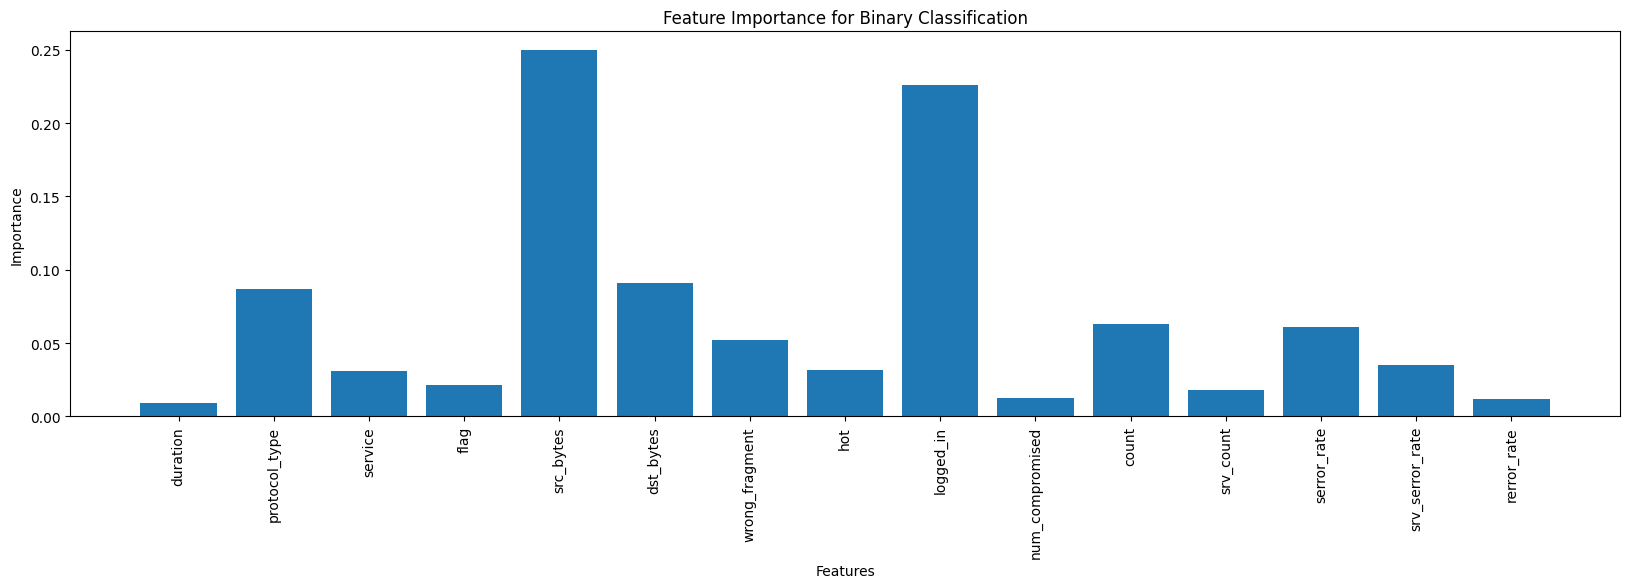

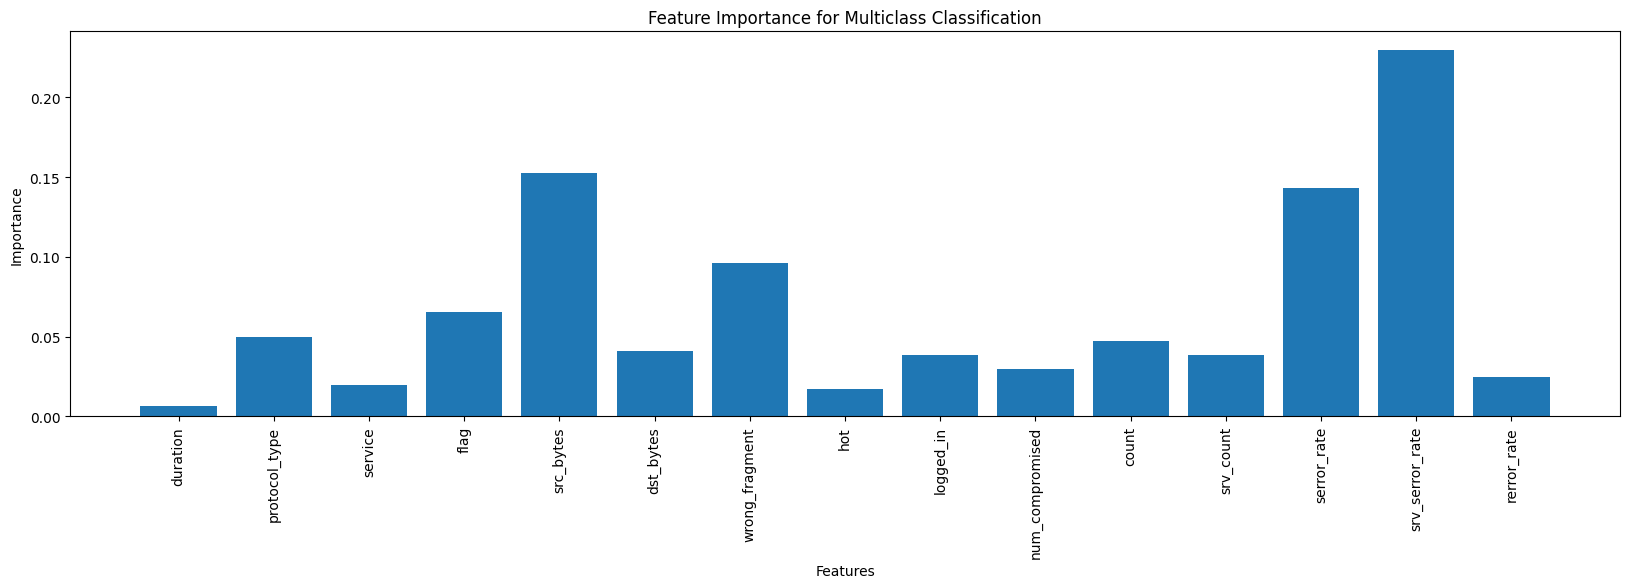

In [37]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from scipy.stats import uniform, randint
import matplotlib.pyplot as plt

# List of features that you're using for training
columns = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
           'dst_bytes', 'wrong_fragment', 'hot', 'logged_in', 'num_compromised',
           'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate']

# Step 1: Define the hyperparameter grid for XGBoost (both binary and multiclass)
param_dist = {
    'max_depth': randint(3, 15),               # Tree depth range from 3 to 15
    'learning_rate': uniform(0.01, 0.2),       # Learning rate between 0.01 and 0.2
    'n_estimators': randint(50, 500),          # Number of trees between 50 and 500
    'subsample': uniform(0.5, 0.5),             # Subsample ratio between 0.5 and 1
    'colsample_bytree': uniform(0.5, 0.5),     # Column subsample ratio
    'gamma': uniform(0, 1),                    # Gamma between 0 and 1
    'min_child_weight': randint(1, 10),         # Minimum sum of instance weight for child nodes
}

# Step 2: Initialize the XGBoost model for Binary Classification (using 'attack' target)
xgb_model_binary = xgb.XGBClassifier(
    objective='binary:logistic',     # Binary classification
    eval_metric='logloss',           # Log loss evaluation metric
    use_label_encoder=False          # Suppress label encoder warning
)

# Step 3: Apply RandomizedSearchCV for Binary Classification
random_search_binary = RandomizedSearchCV(
    estimator=xgb_model_binary,
    param_distributions=param_dist,
    n_iter=100,                      # Number of random combinations to try
    scoring='accuracy',              # Evaluate based on accuracy
    cv=3,                            # 3-fold cross-validation
    verbose=1,                       # Print progress
    random_state=42,                 # Set a random seed for reproducibility
    n_jobs=-1                         # Use all available CPU cores
)

# Step 4: Fit RandomizedSearchCV for Binary Classification
random_search_binary.fit(X_train, y_train['attack'])

# Print the best hyperparameters for Binary Classification
print("Best Hyperparameters for Binary Classification:")
print(random_search_binary.best_params_)

# Get the best model from RandomizedSearchCV
best_model_binary = random_search_binary.best_estimator_

# Step 5: Make Predictions for Binary Classification
y_pred_binary = best_model_binary.predict(X_test)

# Evaluate the Binary Classification Model
accuracy_binary = accuracy_score(y_test['attack'], y_pred_binary)
print(f"Binary Classification Accuracy: {accuracy_binary:.4f}")

# Classification report for binary classification
print("\nBinary Classification Report:")
print(classification_report(y_test['attack'], y_pred_binary))

# Confusion matrix for binary classification
print("\nBinary Classification Confusion Matrix:")
print(confusion_matrix(y_test['attack'], y_pred_binary))

# Step 6: Train and apply RandomizedSearchCV for Multiclass Classification (using 'attack_map' target)
xgb_model_multiclass = xgb.XGBClassifier(
    objective='multi:softmax', # Multiclass classification
    num_class=5,               # Number of classes in the target variable (Normal, DoS, Probe, Privilege, Access)
    eval_metric='merror',      # Multi-class error rate
    use_label_encoder=False    # Disable the label encoder warning
)

# Apply RandomizedSearchCV for Multiclass Classification
random_search_multiclass = RandomizedSearchCV(
    estimator=xgb_model_multiclass,
    param_distributions=param_dist,
    n_iter=100,                      # Number of random combinations to try
    scoring='accuracy',              # Evaluate based on accuracy
    cv=3,                            # 3-fold cross-validation
    verbose=1,                       # Print progress
    random_state=42,                 # Set a random seed for reproducibility
    n_jobs=-1                         # Use all available CPU cores
)

# Step 7: Fit RandomizedSearchCV for Multiclass Classification
random_search_multiclass.fit(X_train, y_train['attack_map'])

# Print the best hyperparameters for Multiclass Classification
print("Best Hyperparameters for Multiclass Classification:")
print(random_search_multiclass.best_params_)

# Get the best model from RandomizedSearchCV for multiclass
best_model_multiclass = random_search_multiclass.best_estimator_

# Step 8: Make Predictions for Multiclass Classification
y_pred_multiclass = best_model_multiclass.predict(X_test)

# Evaluate the Multiclass Classification Model
accuracy_multiclass = accuracy_score(y_test['attack_map'], y_pred_multiclass)
print(f"\nMulticlass Classification Accuracy: {accuracy_multiclass:.4f}")

# Classification report for multiclass classification
print("\nMulticlass Classification Report:")
print(classification_report(y_test['attack_map'], y_pred_multiclass))

# Confusion matrix for multiclass classification
print("\nMulticlass Classification Confusion Matrix:")
print(confusion_matrix(y_test['attack_map'], y_pred_multiclass))

# Step 9: Feature Importance (for both models)
importances_binary = best_model_binary.feature_importances_
importances_multiclass = best_model_multiclass.feature_importances_

# Plot Feature Importance for Binary Classification
plt.figure(figsize=(20, 5))
plt.bar(columns, importances_binary)
plt.title('Feature Importance for Binary Classification')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=90)
plt.show()

# Plot Feature Importance for Multiclass Classification
plt.figure(figsize=(20, 5))
plt.bar(columns, importances_multiclass)
plt.title('Feature Importance for Multiclass Classification')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=90)
plt.show()
